<a href="https://colab.research.google.com/github/harshitayadavv/Life-Expectancy-Prediction/blob/main/Life_Expectancy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data preprocessing


#### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing the dataset

In [3]:
df = pd.read_csv("Life Expectancy Data.csv")
df.columns = df.columns.str.strip()
X = df.drop('Life expectancy', axis=1)
y = df['Life expectancy']
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


#### Dropping irrelevant columns

In [4]:
df.drop('Country', axis=1, inplace=True)  # Country is not useful for regression

#### Missing values

In [5]:
df.isnull().values.any()


np.True_

In [6]:
df.columns = df.columns.str.strip()
df.isnull().sum()


,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0
BMI,34


In [7]:
numerical_cols = ['Year', 'Life expectancy', 'Adult Mortality', 'infant deaths',
                  'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles',
                  'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
                  'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
                  'thinness  1-19 years', 'thinness 5-9 years',
                  'Income composition of resources', 'Schooling']

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])
df.dropna(inplace=True)



In [8]:
df.isnull().values.any()


np.False_

#### Encoding Categorical Data

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

X = df.drop('Life expectancy', axis=1)
y = df['Life expectancy']

ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), ['Status'])
    ],
    remainder='passthrough'
)

X = np.array(ct.fit_transform(X))
print(X)

[[0.000e+00 1.000e+00 2.015e+03 ... 1.730e+01 4.790e-01 1.010e+01]
 [0.000e+00 1.000e+00 2.014e+03 ... 1.750e+01 4.760e-01 1.000e+01]
 [0.000e+00 1.000e+00 2.013e+03 ... 1.770e+01 4.700e-01 9.900e+00]
 ...
 [0.000e+00 1.000e+00 2.002e+03 ... 1.300e+00 4.270e-01 1.000e+01]
 [0.000e+00 1.000e+00 2.001e+03 ... 1.700e+00 4.270e-01 9.800e+00]
 [0.000e+00 1.000e+00 2.000e+03 ... 1.120e+01 4.340e-01 9.800e+00]]


#### Splitting the dataset into the training set and test set

In [10]:
from sklearn.model_selection import train_test_split

# Split the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)


#### Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Building the model

In [12]:
#random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Create and train the model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=1)
rf_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_reg.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest R² Score: {r2_rf:.4f}")


Random Forest R² Score: 0.9633


## Visualization

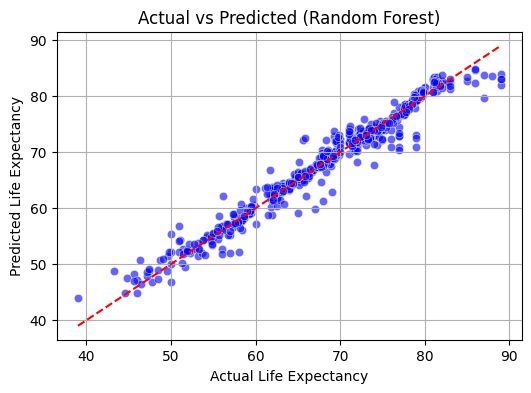

In [13]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred_rf, color='blue', alpha=0.6)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs Predicted (Random Forest)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.grid(True)
plt.show()

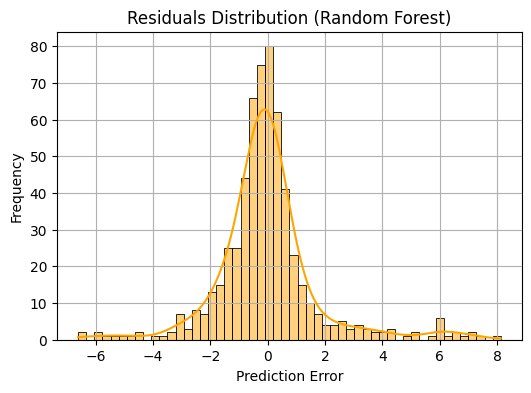

In [14]:
# Residual plot
residuals = y_test - y_pred_rf

plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, color='orange')
plt.title('Residuals Distribution (Random Forest)')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### Predicting result

In [15]:
results = pd.DataFrame({
    'Actual': y_test[:10].values,
    'Predicted': y_pred_rf[:10]
})
print(results)

   Actual  Predicted
0    82.1  82.174000
1    58.4  56.008000
2    63.3  64.453000
3    67.9  67.795000
4    47.8  46.832000
5    89.0  81.975000
6    67.7  69.076997
7    72.5  71.856000
8    71.9  72.075000
9    78.9  79.370000


In [16]:
custom_data = [[2020, 72.5, 180.0, 12, 4.2, 250.0, 88.0, 30.0, 23.5, 18,
                94.0, 6.0, 90.0, 0.2, 1200.0, 7000000.0, 4.0, 3.5,
                0.70, 13.0, 0.75]]

custom_data_scaled = sc.transform(custom_data)
predicted_value = rf_reg.predict(custom_data_scaled)
print(f"Predicted Life Expectancy: {predicted_value[0]:.2f} years")


Predicted Life Expectancy: 55.98 years
